<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2022/blob/main/notebooks/es2/MetodiAI_Fis2022_Es2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione 2: python e uso librerie numpy, matplotlib, pandas

**Task:**

implementare senza uso di librerie di Machine Learning un primo semplice algoritmo di classificazione basato sul Likelihood Ratio di Bayes e sulla stima della delle densità di probabilità delle feature (Naive Bayes Classifier)

**Parte 1:**

generare il toy dataset 

1.   generare due campioni di esempi toy (classe segnale e classe fondo), in accordo a distribuzioni gaussiane multivariate con dimensione d=3: $f(x_0,x_1,x_2) = GaussianaMultivariata(x_0,x_1,x_2:\mu, cov)$, con $\mu$ il vettore delle medie delle tre variabili e $cov$ la matrice di covarianza (ogni dimensione corrisponde ad una feature (osservabile) del dataset). <p>
`usare la funzione numpy: np.random.multivariate_normal`

> le medie delle due distribuzioni per segnale e fondo da utilizzare sono: $\mu_S = [0.0, 4.0, -1.0]$, $\mu_B = [-2.5, 2.0, 2.0]$ 
> la matrice di covarianza tra le variabili è la stessa per le due classi $S$ e $B$ ed è data dalla matrice diagonale $diag[4.0, 1.0, 2.25]$
> la dimensione dei campioni è $N=3000$ (per ognuna delle due classi)

2. graficare le distribuzioni ottenute su proiezioni 2D: $(x_0,x_1), (x_0,x_2), (x_1,x_2)$ colorando con colori rosso e blu i punti appartenenti agli eventi di classe $S$ e $B$ rispettivamente <p>
`usare la funzione matplotlib: plt.plot`


In [ ]:
#code

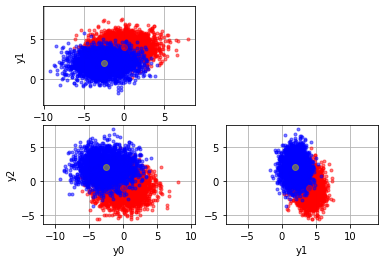

In [1]:
#@title Soluzione Parte 1 (clicca su show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt

# genera 3 osservabili gaussiane, correlate (x1,x2,x3)

N = 3000

# valori medi delle tre osservabili
muS = np.array([0.0, 4.0, -1.0])
muB = np.array([-2.5, 2.0, 2.0])

# matrice di covarianza
rS = np.array([
        [ 4.0, 0.0, 0.0],
        [ 0.0, 1.0, 0.0],
        [ 0.0, 0.0, 2.25]
    ])

rB = rS


# Generazione usando numpy
yS = np.random.multivariate_normal(muS, rS, size=N)
yB = np.random.multivariate_normal(muB, rB, size=N)


# Plot delle diverse proiezioni
plt.subplot(2,2,1)
plt.plot(yS[:,0], yS[:,1], 'r.', alpha=0.5)
plt.plot(yB[:,0], yB[:,1], 'b.', alpha=0.5)
plt.plot(muS[0], muS[1], 'ro', alpha=0.5)
plt.plot(muB[0], muB[1], 'yo', alpha=0.5)
plt.ylabel('y1')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(yS[:,0], yS[:,2], 'r.', alpha=0.5)
plt.plot(yB[:,0], yB[:,2], 'b.', alpha=0.5)
plt.plot(muS[0], muS[2], 'ro', alpha=0.5)
plt.plot(muB[0], muB[2], 'yo', alpha=0.5)
plt.xlabel('y0')
plt.ylabel('y2')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(yS[:,1], yS[:,2], 'r.', alpha=0.5)
plt.plot(yB[:,1], yB[:,2], 'b.', alpha=0.5)
plt.plot(muS[1], muS[2], 'ro', alpha=0.5)
plt.plot(muB[1], muB[2], 'yo', alpha=0.5)
plt.xlabel('y1')
plt.axis('equal')
plt.grid(True)

plt.show()

**Parte 2:**

stima delle funzioni di distribuzione di probabilità delle singole osservabili per le due classi $S$ e $B$: $pdf(x_0|C), pdf(x_1|C),pdf(x_2|C)$ con $C=S,B$ 

1.   costruire vari histogrammi con $M=20$ bin negli intervalli $(\mu-4\sigma, \mu+4\sigma)$ che contengano la densità di probabilità ad ogni bin per le varie features $x_0,x_1,x_2$ nelle due classe, e utilizzateli in una funzione python che dato un valore della feature ritorni la stima della probabilità associata $f(x_i) = pdf(x_i|S)$.
> NOTA1: usare solo i primi 2000 eventi di ogni campione per costruire gli istogrammi, lasciando 1000 come campione di test.                             
NOTA2: la funzione *n, edges, patches = plt.hist(x,...)* di matplotlib ritorna tre array numpy, *n* contenenente i valori dei bin, *edges* contenente le edge (il valore della $x$ corrispondente all'estremo superiore) di ogni bin, ed il terzo non interessante per gli scopi.
2.   plottare con matplotlib gli istogrammi così costruiti 

In [ ]:
#codice

pdf(x0=4.0|S) =  0.03251625812906458
pdf(x0=4.0|S) =  0.03251625812906458
20
[-8.  -7.2 -6.4 -5.6 -4.8 -4.  -3.2 -2.4 -1.6 -0.8  0.   0.8  1.6  2.4
  3.2  4.   4.8  5.6  6.4  7.2  8. ]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


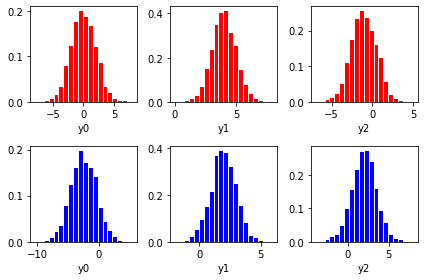

In [19]:
#@title Soluzione Parte 2 (clicca sul show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt 

pdfS = []
edgesS = []
pdfB = []
edgesB = []
for i in range(3):
  plt.subplot(2,3,i+1)
  n, edges, _ = plt.hist(yS[:2000,i], bins=20, rwidth=0.8, color='red', range=(muS[i]-4*np.sqrt(rS[i,i]),muS[i]+4*np.sqrt(rS[i,i])), density=True)
  plt.xlabel('y'+str(i))
  pdfS.append(n)
  edgesS.append(edges)
  plt.subplot(2,3,i+4)
  n, edges, _ = plt.hist(yB[:2000,i], bins=20, rwidth=0.8, color='blue', range=(muB[i]-4*np.sqrt(rB[i,i]),muB[i]+4*np.sqrt(rB[i,i])), density=True)
  plt.xlabel('y'+str(i))
  pdfB.append(n)
  edgesB.append(edges)
plt.tight_layout()


def pdf_fun(x,P,E):
  if x>E[-1]: return 0.0 #above max range 
  res = np.asarray(E<x).nonzero()
  if np.size(res)>0:
    bin = np.max(res)
    if bin<len(P) and bin>0:
      return P[bin]
  return 0.0 

#oppure:

def pdf_fun2(x,P,E):
  if x<E[0]: return 0.0 #below min range 
  res = np.asarray(E>=x).nonzero()
  if np.size(res)>0:
    bin = np.min(res)-1
    if bin<len(P) and bin>0:
      return P[bin]
  return 0.0

print('pdf(x0=4.0|S) = ', pdf_fun(4.0, pdfS[0], edgesS[0]))
print('pdf(x0=4.0|S) = ', pdf_fun2(4.0, pdfS[0], edgesS[0]))

print(len(pdfS[0]))
print(edgesS[0])

res = np.where(edgesS[0]<=33.0)[0]
print(res)




**Parte 3:**

costruire un classificatore basato sul maximum likelihood ratio, assumendo stesse probabilità a priori per le due classi $P(S)=P(B)$ e costi simmetrici e stimarne le prestazioni:

1.    costruire la funzione discriminante $d(x_0,x_1,x_2) = \frac{\prod_{i=0}^2\, p(x_i|S)}{\prod_{i=0}^2\, p(x_i|S)+\prod_{i=0}^2\, p(x_i|B)}$ in cui la produttoria scorre sulle pdf delle tre feature
2.    printare i valori di $d(\mu_S)$ e $d(\mu_B)$
3.    graficare un istogramma della variabile discriminante $d$ per gli eventi delle classi $S$ e $B$ 
4.    costruire una funzione che implementi la regola di classificazione: $d(x_0,x_1,x_2)\ge 0.5 \to \text{classe}\,S;\,\,\text{altimenti} \to \text{classe}\,B$
5.    usando i 2000 eventi del campione usato per costrire le pdf calcolare **accuracy, precision, recall** e confusion matrix
6.    ripetere il calcolo usando i 1000 eventi del test set che **non** sono stati utilizzati per calcolare le pdf, e confrontare i risultati ottenuti

NOTA: $\frac{S}{S+B}>\alpha \to S$ è equivalente al LR d Bayes $\frac{S}{B}>\frac{\alpha}{1-\alpha} \to S$. Nel caso specifico di costi simmetrici e $P(S)=P(B)$ abbiamo $\frac{S}{B}>1$ e quindi $\frac{\alpha}{1-\alpha}=1 \to \alpha = \frac{1}{2}$ e quindi $\frac{S}{B}>1 \to S$ equivalente a $\frac{S}{S+B}>\frac{1}{2} \to S$.

In [ ]:
#codice

d(muS) =  0.9945363860517523
d(muB) =  0.005379842613666386
Confusion matrix training:
[[1888  112]
 [ 117 1883]]
accuracy train:  0.94275
precision train:  0.9416458852867831
recall train:  0.944
Confusion matrix test:
[[948  52]
 [ 58 942]]
accuracy test:  0.945
precision test:  0.9423459244532804
recall test:  0.948


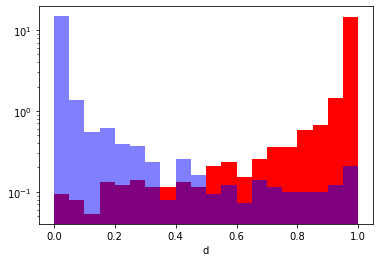

In [23]:
#@title Soluzione Parte 3 (clicca su show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt 

def d(X,PS,ES,PB,EB):

  S = 1.0
  B = 1.0
  for i in range(3):
    S *= pdf_fun(X[i],PS[i],ES[i])
    B *= pdf_fun(X[i],PB[i],EB[i])
  if (S+B)>0:
    return S/(S+B)
  else:
    return 0.5

print('d(muS) = ', d(muS, pdfS,edgesS,pdfB,edgesB))
print('d(muB) = ', d(muB, pdfS,edgesS,pdfB,edgesB))

dS = [d(x,pdfS,edgesS,pdfB,edgesB) for x in yS]
dB = [d(x,pdfS,edgesS,pdfB,edgesB) for x in yB]

plt.hist(dS, bins=20, color='red', range=(0,1), density=True)
plt.xlabel('d')
plt.hist(dB, bins=20, color='blue', alpha=0.5, range=(0,1), density=True)
plt.xlabel('d')
plt.yscale('log')

def disc(X, PS,ES,PB,EB):
  if d(X,PS,ES,PB,EB)>=0.5:
    return  1 #classe S
  else:
    return -1 #classe B

# Confusion matrix training set

resS_train = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yS[:2000]]
resB_train = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yB[:2000]]

TP = np.sum((np.array(resS_train)>=0) == True)
FN = np.sum((np.array(resS_train)<0) == True)
TN = np.sum((np.array(resB_train)<0) == True)
FP = np.sum((np.array(resB_train)>=0) == True)

conf_mat_train = np.array([[TP, FN],[FP, TN]])
print('Confusion matrix training:')
print(conf_mat_train)

acc_train = (TP+TN)/(TP+TN+FN+FP)
precision_train = TP/(TP+FP)
recall_train = TP/(TP+FN)
print('accuracy train: ', acc_train)
print('precision train: ', precision_train)
print('recall train: ', recall_train) 

resS_test = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yS[2000:]]
resB_test = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yB[2000:]]

TP = np.sum((np.array(resS_test)>=0) == True)
FN = np.sum((np.array(resS_test)<0) == True)
TN = np.sum((np.array(resB_test)<0) == True)
FP = np.sum((np.array(resB_test)>=0) == True)

conf_mat_test = np.array([[TP, FN],[FP, TN]])
print('Confusion matrix test:')
print(conf_mat_test)

acc_test = (TP+TN)/(TP+TN+FN+FP)
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
print('accuracy test: ', acc_test)
print('precision test: ', precision_test)
print('recall test: ', recall_test) 


**Per casa:**
1.   provare a giocare con le medie e le varianze delle osservabili, cambiandone i valori. A che punto il classificatore perde il suo potere di classificare gli eventi delle due classi?
2.   provare a ripetere il problema assumendo una matrice di covarianza correlata tra le osservabili (senza cambiare gli elementi della diagonale principale). Le prestazioni dell'algoritmo di classificazione migliorano o peggiorano?
3.   Implementare in modo semplice in python un algoritmo che risolva il problema del commesso viaggiatore utilizzando per trovare la soluzione un algoritmo di ottimizzazione genetico:
> è data una griglia bidimensionale di passo fissato. Posizionate 20 punti in 20 nodi della griglia scelti in modo random (città)
> il problema è quello di visitare tutte e 20 le città senza mai passare per due volte nella stessa città e minimizzando il cammino fatto.                 
> Suggerimento: codificate il problema con un vettore soluzione di dimensione 20 che contiene l'indice di ciascuna città nell'ordine in cui le visitate e con il vincolo che non ci possono essere due elementi del vettore con eguale valore.                                                             
> Partite da una soluzione random e eseguite mutazioni che conservano il vincolo (SWAP (esempio: (1,2,3) --> (1,3,2)) e CROSS-OVER ORDINATO (esempio: (1,2,**3**,4,**5**) e (3,5,1,4,2) --> (1,4,3,2,5))                              
> evolvete solo le mutazioni positive (che minimizzano la distanza percorsa) mentre lasciate estinguere le soluzioni negative...                            
> graficate ogni N epoche la soluzione ottenuta ...